<a href="https://colab.research.google.com/github/AimjGuytidy/Lockdowns-Impact-on-Air-Quality/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [2]:
# path = '/home/origene/Documents/Think it/Lockdowns-Impact-on-Air-Quality-main/data/processed/'
# france = pd.read_csv(path + 'france_data.csv')
# france['Date']= pd.to_datetime(france['Date'])
# france_lock = pd.read_csv(path + 'france_lockdown.csv')

france = pd.read_csv('/content/french_data.csv')
# france_lock = pd.read_csv('/content/french_data.csv')
france['Date'] = pd.to_datetime(france['Date'])

# Set the date column as the index of your DataFrame meat
# france = france.set_index('Date')

# Evaluating data distribution

In [3]:
france.type.value_counts()

0.0    190704
2.0     28763
1.0      8050
Name: type, dtype: int64

# Evaluating number of species

In [4]:
france.Specie.value_counts()

no2              23214
pm10             23206
temperature      22705
pressure         22699
humidity         22636
o3               22456
pm25             21145
wind-speed       19885
dew              18064
wind-gust        15035
so2               7586
co                4699
wind speed        2193
wind gust         1963
precipitation       32
Name: Specie, dtype: int64

# Checking if there is any missing values

In [5]:
ind1 = france[["min","max","median","variance"]]
percent_missing = ind1.isnull().sum() * 100 / len(ind1)
missing_value_df = pd.DataFrame({'column_name': ind1.columns,
                                 'percent_missing': percent_missing})
# ind1 = ind1.T
missing_value_df

,column_name,percent_missing
min,min,0.0
max,max,0.0
median,median,0.0
variance,variance,0.0


In [6]:
france = france.sort_values(['City','Specie'])
france

,Date,Country,City,Specie,count,min,max,median,variance,type
117,2018-12-31,FR,Amiens,humidity,72,98.0,98.0,98.0,0.00,0.0
344,2019-01-01,FR,Amiens,humidity,72,90.1,98.0,95.7,66.01,0.0
628,2019-01-02,FR,Amiens,humidity,72,85.3,98.0,95.0,151.81,0.0
885,2019-01-03,FR,Amiens,humidity,72,91.1,98.0,98.0,33.78,0.0
1004,2019-01-04,FR,Amiens,humidity,72,90.0,98.0,98.0,58.89,0.0
...,...,...,...,...,...,...,...,...,...,...
226273,2021-04-15,FR,Tours,wind-speed,72,2.8,6.6,4.3,13.60,1.0
226629,2021-04-16,FR,Tours,wind-speed,72,2.3,5.6,4.1,10.75,1.0
226780,2021-04-17,FR,Tours,wind-speed,72,1.0,6.1,3.8,20.85,1.0
227092,2021-04-18,FR,Tours,wind-speed,72,1.0,3.0,2.0,3.15,1.0


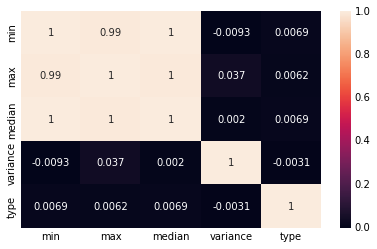

In [7]:
import seaborn as sns
correlation_mat = france[["min","max","median","variance","type"]].corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

# Humidity

In [8]:
humidity = france[france["Specie"]== "humidity"]
humidity = humidity[["min","max","median","variance"]]
# humidity

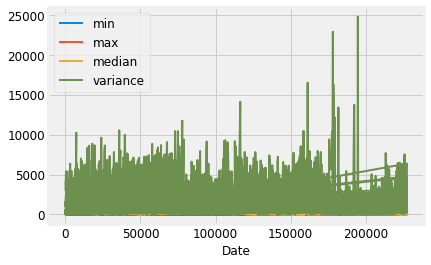

In [9]:
# Plot time series dataset
ax = humidity.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

# pm10

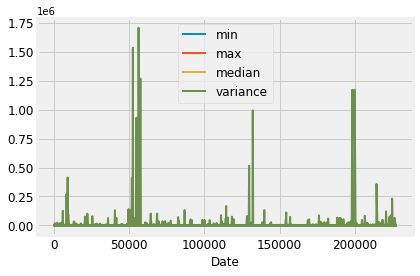

In [10]:
pm10 = france[france["Specie"]== "pm10"]
pm10 = pm10[["min","max","median","variance"]]

# Plot time series dataset
ax = pm10.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

# no2

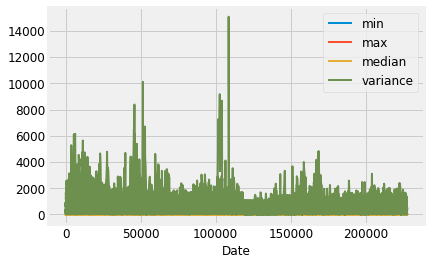

In [11]:
no2 = france[france["Specie"]== "no2"]
no2 = no2[["min","max","median","variance"]]

# Plot time series dataset
ax = no2.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('Date');
ax.legend(fontsize=12);

# Variables

pm10             
no2              
temperature      
pressure        
humidity         
o3               
pm25            
wind-speed       
dew             
wind-gust       
so2               
co                
wind speed       
wind gust         
precipitation  

In [12]:
pm10 = france[france["Specie"]== "pm10"]
pm10_1 = pm10[["Date","Country","City","median"]]
pm10_1=pm10_1.rename(columns = {'median':'pm10'})

no2 = france[france["Specie"]== "no2"]
no2_1 = no2[["Date","median"]]
no2_1=no2_1.rename(columns = {'median':'no2'})

temperature = france[france["Specie"]== "temperature"]
temperature_1 = temperature[["Date","median"]]

pressure = france[france["Specie"]== "pressure"]
pressure_1 = pressure[["Date","median"]]

humidity = france[france["Specie"]== "humidity"]
humidity_1 = humidity[["Date","median"]]

o3 = france[france["Specie"]== "o3"]
o3_1 = o3[["Date","median"]]

pm25 = france[france["Specie"]== "pm25"]
pm25_1 = pm25[["Date","median"]]

wind_speed = france[france["Specie"]== "wind-speed"]
wind_speed_1 = wind_speed[["Date","median"]]


dew = france[france["Specie"]== "dew"]
dew_1 = dew[["Date","median"]]



so2 = france[france["Specie"]== "so2"]
so2_1 = so2[["Date","median"]]

co = france[france["Specie"]== "co"]
co_1 = co[["Date","median"]]


precipitation = france[france["Specie"]== "precipitation"]
precipitation_1 = precipitation[["Date","median"]]


In [13]:
# df4 = pd.concat([pm10_1, no2_1], axis=1)
# pm10_1.join(no2_1, on='Date', how='left', lsuffix='_left', rsuffix='_right')
# pm10_1.join(no2_1, how='outer')
# df = pd.merge(pm10_1,no2_1[['median']],on='Date', how='left')
pm10_1.merge(no2_1[['no2', 'Date']], on = 'Date', how = 'left')

,Date,Country,City,pm10,no2
0,2018-12-31,FR,Amiens,10.0,6.2
1,2018-12-31,FR,Amiens,10.0,10.8
2,2018-12-31,FR,Amiens,10.0,6.0
3,2018-12-31,FR,Amiens,10.0,13.3
4,2018-12-31,FR,Amiens,10.0,15.0
...,...,...,...,...,...
669783,2021-04-19,FR,Tours,18.0,6.0
669784,2021-04-19,FR,Tours,18.0,18.3
669785,2021-04-19,FR,Tours,18.0,7.7
669786,2021-04-19,FR,Tours,18.0,12.0


In [14]:
france.head()

,Date,Country,City,Specie,count,min,max,median,variance,type
117,2018-12-31,FR,Amiens,humidity,72,98.0,98.0,98.0,0.00,0.0
344,2019-01-01,FR,Amiens,humidity,72,90.1,98.0,95.7,66.01,0.0
628,2019-01-02,FR,Amiens,humidity,72,85.3,98.0,95.0,151.81,0.0
885,2019-01-03,FR,Amiens,humidity,72,91.1,98.0,98.0,33.78,0.0
1004,2019-01-04,FR,Amiens,humidity,72,90.0,98.0,98.0,58.89,0.0


In [15]:
france_clean = france.pivot_table(index=['Date', 'Country', 'City','type'],columns='Specie',values='variance').reset_index().sort_values(['Country','City'])

In [16]:
france_clean['Date'] = pd.to_datetime(france_clean['Date'])

In [17]:

france_clean = france_clean.set_index('Date')

In [18]:
france_clean[france_clean['City']=='Amiens']

Specie,Country,City,type,co,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wind gust,wind speed,wind-gust,wind-speed
Date,,,,,,,,,,,,,,,,,,
2018-12-31,FR,Amiens,0.0,NaN,NaN,0.00,404.24,273.98,63.32,1273.63,NaN,2.27,0.08,2.37,NaN,NaN,4.90,1.05
2019-01-01,FR,Amiens,0.0,NaN,NaN,66.01,308.52,99.04,337.62,350.49,NaN,8.75,0.05,3.51,NaN,NaN,7.39,6.01
2019-01-02,FR,Amiens,0.0,NaN,NaN,151.81,360.68,133.13,39.17,716.48,NaN,15.87,0.80,9.35,NaN,NaN,2.54,2.16
2019-01-03,FR,Amiens,0.0,NaN,NaN,33.78,450.85,620.24,167.10,1318.74,NaN,1.76,0.39,10.72,NaN,NaN,1.74,1.93
2019-01-04,FR,Amiens,0.0,NaN,NaN,58.89,505.75,365.41,307.30,1407.69,NaN,3.52,0.35,8.35,NaN,NaN,4.02,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-15,FR,Amiens,1.0,NaN,NaN,1083.73,74.75,953.17,726.30,1790.70,NaN,10.58,NaN,179.26,NaN,NaN,NaN,NaN
2021-04-16,FR,Amiens,1.0,NaN,NaN,1540.83,64.41,1017.04,209.49,1404.66,NaN,6.67,NaN,221.32,NaN,NaN,NaN,NaN
2021-04-17,FR,Amiens,1.0,NaN,NaN,2130.17,NaN,NaN,NaN,NaN,NaN,18.95,NaN,300.57,NaN,NaN,NaN,NaN


In [19]:
france_clean.index

DatetimeIndex(['2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03',
               '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07',
               '2019-01-08', '2019-01-09',
               ...
               '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17',
               '2021-04-18', '2021-04-19'],
              dtype='datetime64[ns]', name='Date', length=22246, freq=None)

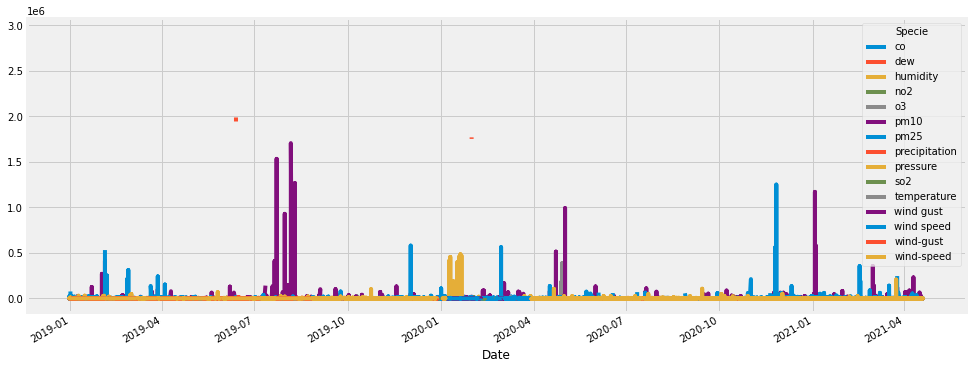

In [20]:
france_clean[france_clean.columns.drop(['Country', 'City', 'type'])].plot(figsize=(15, 6))
plt.show()

In [21]:
france_clean[france_clean['City']=='Amiens'].isna().sum()

Specie
Country            0
City               0
type               0
co               826
dew              826
humidity          21
no2               18
o3                20
pm10              17
pm25             348
precipitation    826
pressure          21
so2              246
temperature       21
wind gust        762
wind speed       764
wind-gust        490
wind-speed       482
dtype: int64

In [22]:
france_clean[france_clean['City']=='Paris'].isna().sum()

Specie
Country            0
City               0
type               0
co                 1
dew               25
humidity          20
no2                1
o3                 1
pm10               1
pm25               0
precipitation    842
pressure          20
so2                5
temperature       20
wind gust        765
wind speed       763
wind-gust         90
wind-speed        88
dtype: int64

In [23]:
import seaborn as sns

In [24]:
# sns.pairplot(france_clean[france_clean['City']=='Paris'])

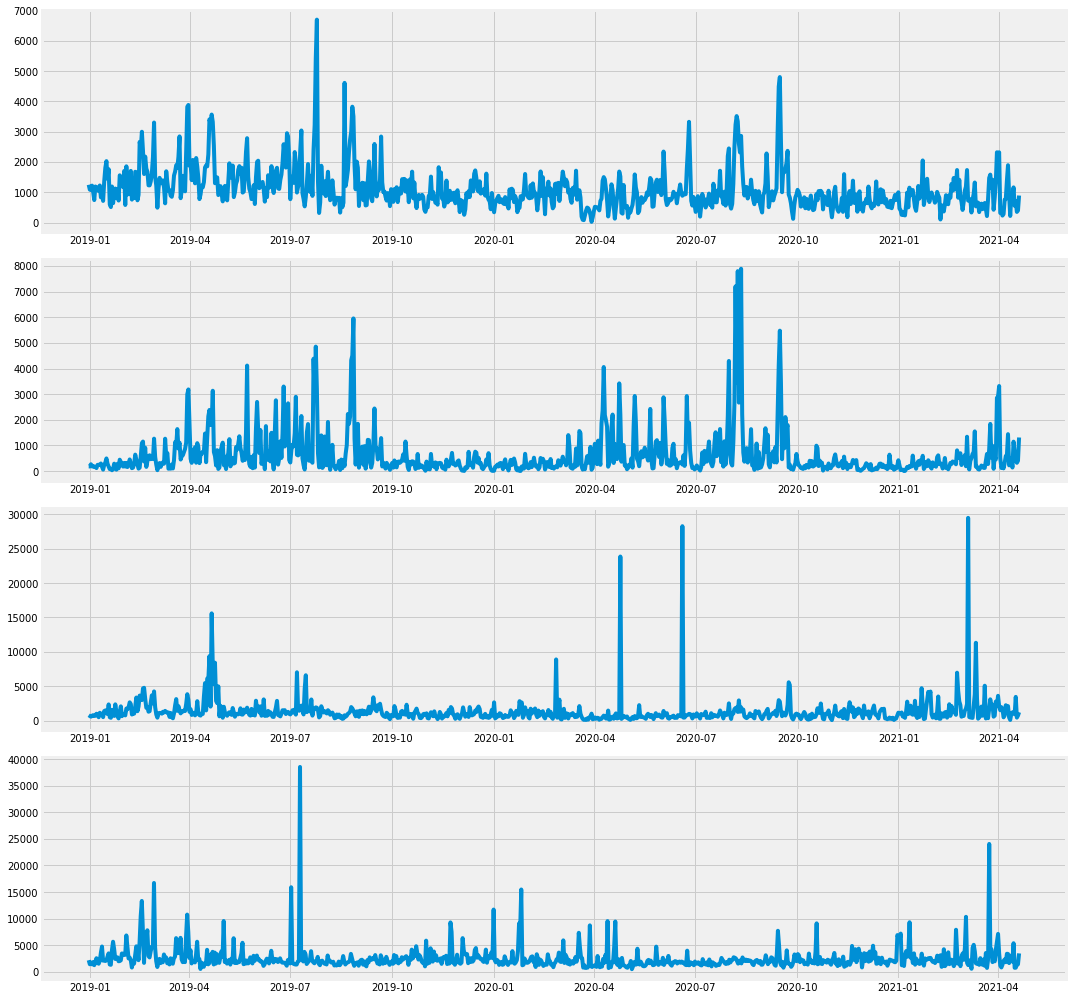

In [25]:
fig,ax=plt.subplots(nrows=4,ncols=1,figsize=[15,14])
ax[0].plot(france_clean[france_clean['City']=='Paris']['no2'])
ax[1].plot(france_clean[france_clean['City']=='Paris']['o3'])
ax[2].plot(france_clean[france_clean['City']=='Paris']['pm10'])
ax[3].plot(france_clean[france_clean['City']=='Paris']['pm25'])
plt.tight_layout()
plt.show()

In [26]:
france_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22246 entries, 2018-12-31 to 2021-04-19
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        22246 non-null  object 
 1   City           22246 non-null  object 
 2   type           22246 non-null  float64
 3   co             4497 non-null   float64
 4   dew            17241 non-null  float64
 5   humidity       21622 non-null  float64
 6   no2            22106 non-null  float64
 7   o3             21386 non-null  float64
 8   pm10           22098 non-null  float64
 9   pm25           20146 non-null  float64
 10  precipitation  32 non-null     float64
 11  pressure       21678 non-null  float64
 12  so2            7261 non-null   float64
 13  temperature    21681 non-null  float64
 14  wind gust      1846 non-null   float64
 15  wind speed     2056 non-null   float64
 16  wind-gust      14370 non-null  float64
 17  wind-speed     18923 non-null  fl

In [27]:
%pip install plotly

In [28]:
import plotly.express as px

In [29]:
px.scatter(data_frame=france_clean[france_clean['City']=='Paris'],x=france_clean[france_clean['City']=='Paris'].index,y='pm25',color='type')

In [30]:
px.scatter(data_frame=france_clean[france_clean['City']=='Paris'],x=france_clean[france_clean['City']=='Paris'].index,y='pm10',color='type')

In [31]:
px.scatter(data_frame=france_clean[france_clean['City']=='Paris'],x=france_clean[france_clean['City']=='Paris'].index,y='o3',color='type')

In [32]:
px.scatter(data_frame=france_clean[france_clean['City']=='Paris'],x=france_clean[france_clean['City']=='Paris'].index,y='no2',color='type')

In [33]:
px.scatter(data_frame=france_clean[france_clean['City']=='Paris'],x=france_clean[france_clean['City']=='Paris'].index,y='humidity',color='type')

In [34]:
px.scatter(data_frame=france_clean[france_clean['City']=='Paris'],x=france_clean[france_clean['City']=='Paris'].index,y='dew',color='type')

In [35]:
px.scatter(data_frame=france_clean[france_clean['City']=='Paris'],x=france_clean[france_clean['City']=='Paris'].index,y='wind-speed',color='type')

In [44]:
px.line(data_frame=france_clean[france_clean['City']=='Paris'],x=france_clean[france_clean['City']=='Paris'].index,y='o3')

In [41]:
df_ozone = france_clean[france_clean['City']=='Paris'][['o3']]
df_ozone.head()

Specie,o3
Date,
2018-12-31,180.46
2019-01-01,179.52
2019-01-02,264.86
2019-01-03,180.11
2019-01-04,201.94


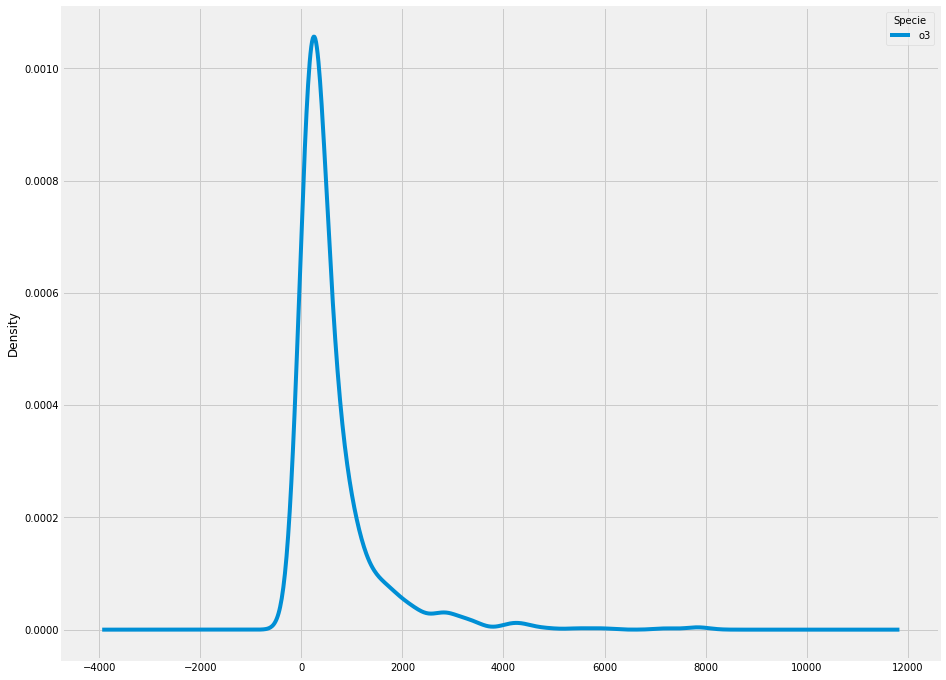

In [43]:
df_ozone.plot(kind='kde',figsize=[14,12]);

## Time series Forecasting of Ozone using Prophet

In [47]:
%pip install pystan==2.19.1.1 prophet

     |████████████████████████████████| 65 kB 3.0 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 216 kB 19.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640144 sha256=0ac8e788e609d05bae7d3cb486312eb252b203aefd4fa204e7e917bfad90b6f4
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [48]:
import pandas as pd
from prophet import Prophet  

In [45]:
df_ozone.reset_index().head()

Specie,Date,o3
0,2018-12-31,180.46
1,2019-01-01,179.52
2,2019-01-02,264.86
3,2019-01-03,180.11
4,2019-01-04,201.94


In [46]:
df_ozone_reset = df_ozone.reset_index()
df_ozone_reset.sample(15)

Specie,Date,o3
260,2019-09-17,891.27
454,2020-03-29,51.70
181,2019-06-30,430.45
799,2021-03-09,727.75
176,2019-06-25,3298.12
287,2019-10-14,602.90
421,2020-02-25,170.87
815,2021-03-25,520.16
135,2019-05-15,1056.08
197,2019-07-16,1518.55


In [50]:
df_ozone_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    842 non-null    datetime64[ns]
 1   o3      841 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.3 KB


In [57]:
df_model = df_ozone_reset.rename(columns={"Date":"ds","o3":"y"})
df_model.columns.name = None
df_model = df_model.dropna()
df_model.head()

,ds,y
0,2018-12-31,180.46
1,2019-01-01,179.52
2,2019-01-02,264.86
3,2019-01-03,180.11
4,2019-01-04,201.94


In [59]:
m=Prophet()
m.fit(df_model);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
future = m.make_future_dataframe(periods=215)
future.head()

,ds
0,2018-12-31
1,2019-01-01
2,2019-01-02
3,2019-01-03
4,2019-01-04


In [58]:
df_model.tail()

,ds,y
836,2021-04-15,741.87
837,2021-04-16,418.12
838,2021-04-17,322.42
839,2021-04-18,401.81
840,2021-04-19,1309.49


In [61]:
future.tail()

,ds
1051,2021-11-16
1052,2021-11-17
1053,2021-11-18
1054,2021-11-19
1055,2021-11-20


In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1051,2021-11-16,241.581059,-769.154024,1294.225465
1052,2021-11-17,209.994069,-769.673190,1203.416932
1053,2021-11-18,277.246919,-744.450037,1240.677081
1054,2021-11-19,120.672202,-872.226487,1221.036337
1055,2021-11-20,78.717026,-875.879913,1107.420671


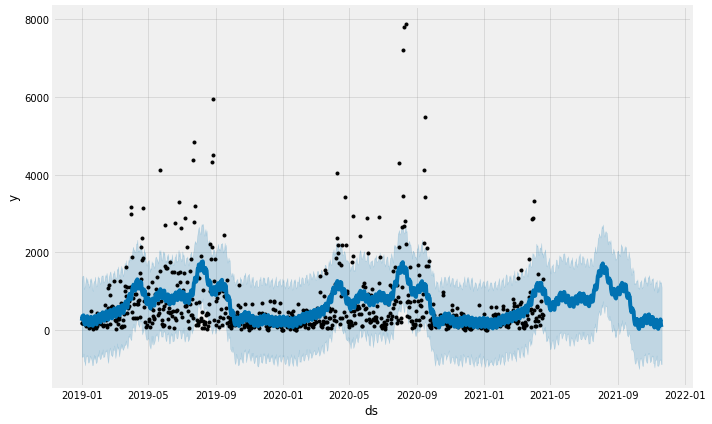

In [63]:
fig0 = m.plot(forecast)

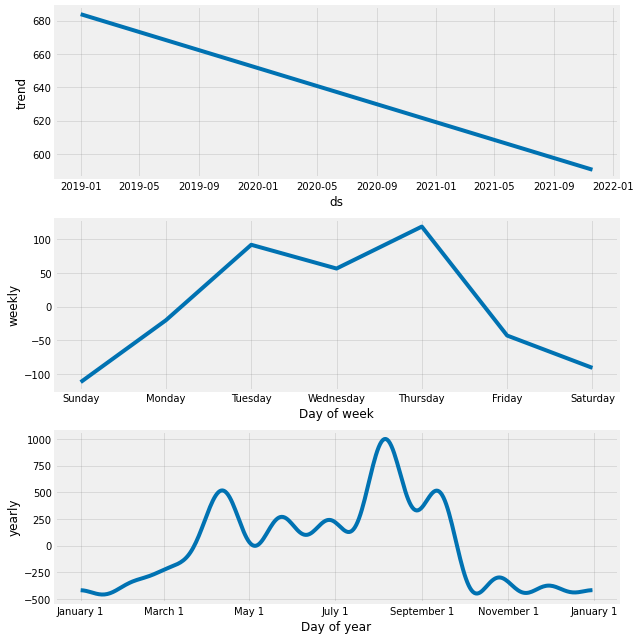

In [64]:
fig1 = m.plot_components(forecast)

In [65]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [66]:
plot_components_plotly(m, forecast)